In [11]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df_kick = pd.read_csv('C:/Users/Nischal Rajput/ks-projects-201801.csv')

In [13]:
print(df_kick.shape)

(378661, 15)


In [14]:

print(df_kick.info())
df_kick.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB
None


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [83]:
print("Min Goal and Pledged values")
print(df_kick[["goal", "pledged"]].min())
print("")
print("Mean Goal and Pledged values")
print(round(df_kick[["goal", "pledged"]].mean(),2))
print("")
print("Median Goal and Pledged values")
print(df_kick[["goal", "pledged"]].median())
print("")
print("Max Goal and Pledged values")
print("goal       100000000.0") #If i put the both together give me back log values, 
print("pledged     20338986.27") # so i decide to just show this values
print("dtype: float64")
print("")
print("Std Goal and Pledged values")
print(round(df_kick[["goal", "pledged"]].std(),2))

Min Goal and Pledged values
goal       0.01
pledged    0.00
dtype: float64

Mean Goal and Pledged values
goal       49080.79
pledged     9682.98
dtype: float64

Median Goal and Pledged values
goal       5200.0
pledged     620.0
dtype: float64

Max Goal and Pledged values
goal       100000000.0
pledged     20338986.27
dtype: float64

Std Goal and Pledged values
goal       1183391.26
pledged      95636.01
dtype: float64


In [84]:
main_cats = df_kick["main_category"].value_counts()


In [85]:
main_cats_failed = df_kick[df_kick["state"] == "failed"]["main_category"].value_counts()
print(main_cats_failed)

Film & Video    32904
Publishing      23145
Music           21752
Technology      20616
Games           16003
Food            15969
Design          14814
Fashion         14182
Art             14131
Photography      6384
Crafts           5703
Comics           4036
Theater          3708
Journalism       3137
Dance            1235
Name: main_category, dtype: int64


In [86]:
df_kick["category"].value_counts()[:10]

Product Design    22314
Documentary       16139
Music             15727
Tabletop Games    14180
Shorts            12357
Video Games       11830
Food              11493
Film & Video      10108
Fiction            9169
Fashion            8554
Name: category, dtype: int64

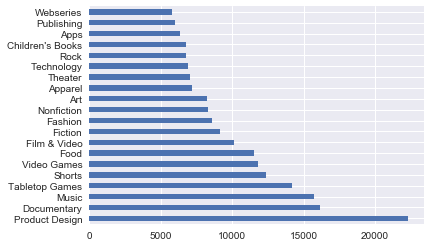

In [19]:
%matplotlib inline
df_kick['category'].value_counts()[:20].plot(kind='barh')

NameError: name 'ax1' is not defined

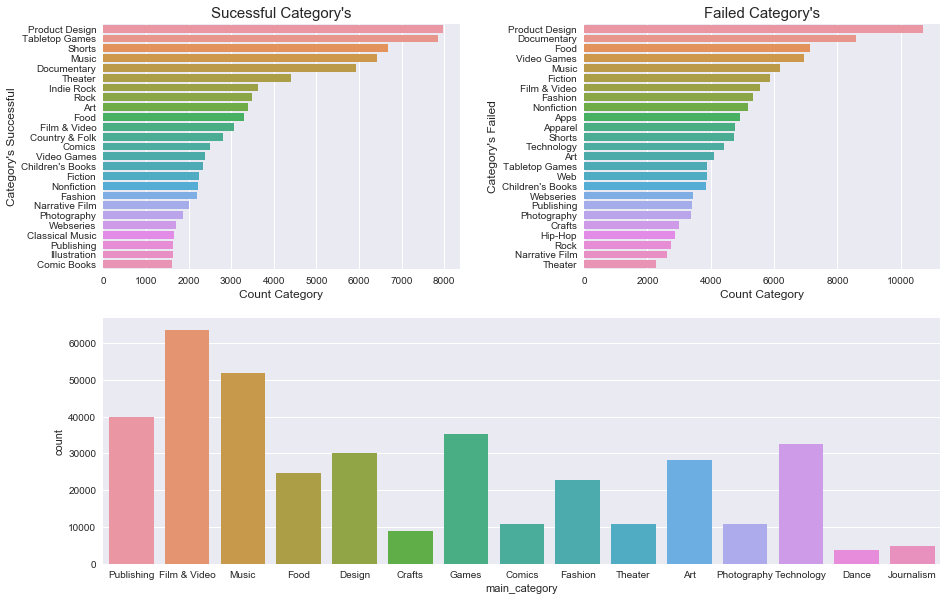

In [69]:
categorys_failed = df_kick[df_kick["state"] == "failed"]["category"].value_counts()[:25]
categorys_sucessful = df_kick[df_kick["state"] == "successful"]["category"].value_counts()[:25]

fig, ax = plt.subplots(ncols=2, figsize=(15,20))
plt.subplots_adjust(wspace = 0.35, top = 0.5)

g1 = plt.subplot(222)
g1 = sns.barplot(x= categorys_failed.values, y=categorys_failed.index, orient='h')
g1.set_title("Failed Category's", fontsize=15)
g1.set_xlabel("Count Category", fontsize=12)
g1.set_ylabel("Category's Failed", fontsize=12)

g2 = plt.subplot(221)
g2 = sns.barplot(x= categorys_sucessful.values, y=categorys_sucessful.index, orient='h')
g2.set_title("Sucessful Category's", fontsize=15)
g2.set_xlabel("Count Category", fontsize=12)
g2.set_ylabel("Category's Successful", fontsize=12)

ax2 = plt.subplot(212)
ax2 = sns.countplot(x="main_category", data=df_kick)
ax2.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax2.set_title("General Main Category's", fontsize=15)
ax2.set_xlabel("Main Category", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

plt.show()

In [ ]:
# goals and pledges 
is_USA = df_kick['currency'] == 'USD'
was_successful = df_kick['state'] == 'successful'
was_failed = df_kick['state'] == 'failed'
df4 = df_kick[['main_category', 'usd pledged', 'usd_pledged_real', 'usd_goal_real']]



In [ ]:
print(df4[is_USA & was_successful].groupby('main_category').median())

In [ ]:
print(df4[is_USA & was_failed].groupby('main_category').median())

In [ ]:
x= df_kick.iloc[:,0:15]
x.head(n=2)
Y= df_kick.loc[:,'usd_pledged_real']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, Y, test_size = 0.3, random_state = 100)

In [ ]:
def num_missing(x):
  return sum(x.isnull())


print(df_kick.apply(num_missing, axis=0))

In [71]:
print("Missing values per column:")
print(df_kick.apply(num_missing, axis=0))
print(df_kick)

Missing values per column:
ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
laun_month_year        0
laun_year              0
laun_hour              0
dead_month_year        0
dead_year              0
time_campaign          0
dtype: int64
                ID                                               name  \
0       1000002330                    The Songs of Adelaide & Abullah   
1       1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2       1000004038                                     Where is Hank?   
3       1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4       1000011046  Community Film Project: The Art of Neighborhoo... 

In [87]:
print(df_kick.apply(num_missing, axis=0))
print(df_kick.values())

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
laun_month_year        0
laun_year              0
laun_hour              0
dead_month_year        0
dead_year              0
time_campaign          0
dtype: int64


TypeError: 'numpy.ndarray' object is not callable

In [ ]:
df_kick['state'].value_counts()

df_kick.sort_values(by='goal', ascending=False)[:10]

In [73]:
df_kick['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [74]:
sensor= df_kick.loc[:,['pledged','backers','usd pledged','usd_pledged_real']]

In [75]:
print(sensor)

         pledged  backers  usd pledged  usd_pledged_real
0           0.00        0         0.00              0.00
1        2421.00       15       100.00           2421.00
2         220.00        3       220.00            220.00
3           1.00        1         1.00              1.00
4        1283.00       14      1283.00           1283.00
5       52375.00      224     52375.00          52375.00
6        1205.00       16      1205.00           1205.00
7         453.00       40       453.00            453.00
8        8233.00       58      8233.00           8233.00
9        6240.57       43      6240.57           6240.57
10          0.00        0         0.00              0.00
11      12700.00      100     12700.00          12700.00
12          0.00        0         0.00              0.00
13          0.00        0         0.00              0.00
14      94175.00      761     57763.78         121857.33
15        664.00       11       664.00            664.00
16        395.00       16      

In [ ]:
avg_row= np.mean(sensor,0)

In [ ]:
sensor.mean(axis=0)

In [76]:
df_kick['launched'] = pd.to_datetime(df_kick['launched'])
df_kick['laun_month_year'] = df_kick['launched'].dt.to_period("M")
df_kick['laun_year'] = df_kick['launched'].dt.to_period("A")
df_kick['laun_hour'] = df_kick['launched'].dt.hour

df_kick['deadline'] = pd.to_datetime(df_kick['deadline'])
df_kick['dead_month_year'] = df_kick['deadline'].dt.to_period("M")
df_kick['dead_year'] = df_kick['launched'].dt.to_period("A")

In [77]:
#Creating a new columns with Campaign total months
df_kick['time_campaign'] = df_kick['dead_month_year'] - df_kick['laun_month_year']
df_kick['time_campaign'] = df_kick['time_campaign'].astype(int)

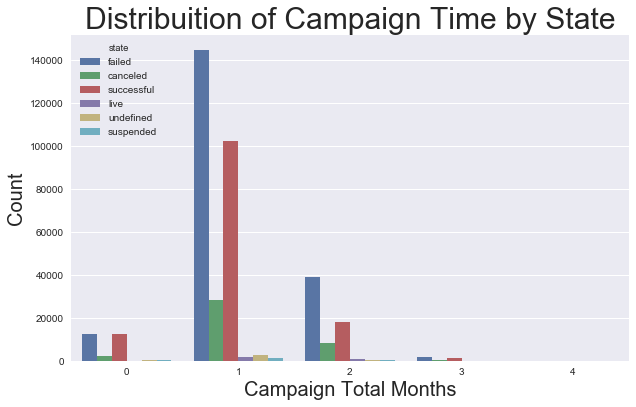

Descriptions of Campaign Time x State
state          canceled  failed  live  successful  suspended  undefined
time_campaign                                                          
0.0                2044   12276    62       12494        153        280
1.0               28144  144494  1785      102102       1251       2710
2.0                8132   38960   948       18240        433        570
3.0                 453    1976     4        1117          8          2
4.0                   0      13     0           3          0          0


In [78]:
plt.figure(figsize = (10,6))

ax = sns.countplot(x='time_campaign', hue='state', 
                   data=df_kick[df_kick['time_campaign'] < 10])
ax.set_title("Distribuition of Campaign Time by State", fontsize=30)
ax.set_xlabel("Campaign Total Months", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.show()

print("Descriptions of Campaign Time x State")
print(pd.crosstab(df_kick[df_kick['time_campaign'] < 5]['time_campaign'], df_kick.state))